# BattChem Data Comparison
## Tools to match the BattChem Model to Empirical Data

Once the BattChem model tools have been developed *(See the "Project Status" and "Explaining Fundamentals" notebooks, WIP)*, a key use-case of this toolkit is to compare the model to empirical data to the model-generated curves.

The final version of this should have almost all python code functionalized in the "nernst_widgets.py" local module, for extreme ease of programming! However, for test and development we will keep this an active code environment until code can be functionalized and shown to work correctly!


In [21]:
import os
import tkinter as tk
from tkinter.filedialog import askopenfilename

# Hard-Code the local image file, default /doc/images/ for this repository 
image_load = '../doc/images/Pan-Liu-UW_ZnMnO2_2016.PNG'

In [22]:
# Alternately, ask for the image
if not os.path.isfile(image_load):
    root = tk.Tk()
    root.lift()
    root.focus_force()
    image_load = askopenfilename(parent=root, initialdir=image_load)
    root.destroy()

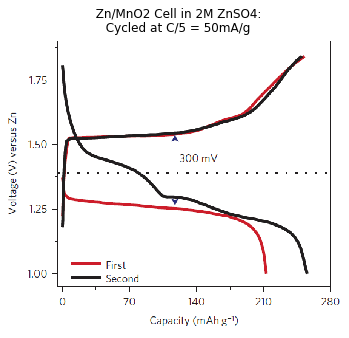

In [30]:
# Now to display our image:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(image_load)
fig,ax = plt.subplots(figsize=[6,6])
plt.axis('off')
ax.set_title("  Zn/MnO2 Cell in 2M ZnSO4:\n  Cycled at C/5 = 50mA/g")
imgplot = ax.imshow(img)
plt.show()

### Now that we have an image, let's discuss it! 
Default here is a C/5 Curve from a paper that I'm critiquing for our MSE 598 ElectroChemical Materials class! It's a $Zn$ metal anode in 2M $ZnSO_4$ electrolyte, versus $MnO_2$ cathode. See the half-reactions below (Shown for "Discharge" Step) as proposed in the paper:

$$ Zn \Longrightarrow 2e^- + Zn^{+2} \qquad E_0 = -0.76 V\quad (vs SHE)$$

$$ MnO_2 + H_2O + e^- \Longrightarrow HMnO_2 + OH^- \qquad E_0 = COMPLEX$$

Note, of course, that there is no single $E_0$ for the Cathode reaction, as it is a multi-stage intercalation and so we will use data to match those curves.

275.0


C:\Users\hurtd\py\battchem\battchem\nernst_reference.py:91: RuntimeWarning: overflow encountered in exp
  Curv[i]["Q"] = Q / (1+np.exp(-1/(0.02569*Z)*(Curv[i]["V"]-Vo))) #Nernst Equation


Text(0.5, 0, 'Capacity (mAh/g)')

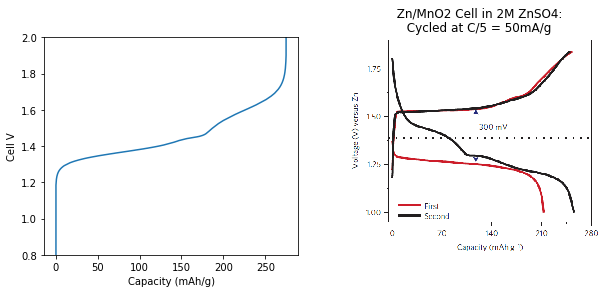

In [36]:
import nernst_reference as nernst
fig,ax=plt.subplots(1,2,figsize=[10,4])
ax[1].set_title("  Zn/MnO2 Cell in 2M ZnSO4:\n  Cycled at C/5 = 50mA/g")
imgplot = ax[1].imshow(img)
ax[1].axis('off')
A,C,Cell,ax[0] = nernst.OCV_Build("Zn_M", "HMnO2", "Zn",
                                  1, 1, 0, ax=ax[0])
ax[0].set_ylim([.8,2.0])
ax[0].set_ylabel("Cell V")
ax[0].set_xlabel("Capacity (mAh/g)")